In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df = pd.read_csv("marketing_AB.csv")
df.head()

,Unnamed: 0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [27]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82988 entries, 0 to 82987
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     82988 non-null  int64  
 1   user_id        82988 non-null  int64  
 2   test_group     82988 non-null  object 
 3   converted      82987 non-null  object 
 4   total_ads      82987 non-null  float64
 5   most_ads_day   82987 non-null  object 
 6   most_ads_hour  82987 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.4+ MB


In [35]:
df["converted"].value_counts()

,count
converted,
False,78737
True,4250


In [42]:
df["test_group"].value_counts()

,count
test_group,
ad,77147
psa,5841


In [43]:
control = df[df["test_group"] == "psa"]
treatment = df[df["test_group"] == "ad"]

len(control), len(treatment)

(5841, 77147)

In [38]:
alpha = 0.05

In [44]:
control_rate = control["converted"].mean()
treatment_rate = treatment["converted"].mean()

control_rate, treatment_rate

(np.float64(0.029447012497859956), np.float64(0.052860809374432896))

In [45]:
t_stat, p_value = ttest_ind(
    treatment["converted"],
    control["converted"],
    equal_var = False
)

t_stat, p_value

(np.float64(nan), np.float64(nan))

In [46]:
if p_value < alpha:
    print("Reject H0 → Statistically significant result")
else:
    print("Fail to reject H0 → No significant difference")


Fail to reject H0 → No significant difference


In [49]:
diff = treatment_rate - control_rate
se = np.sqrt(
    treatment["converted"].var()/len(treatment) +
    control["converted"].var()/len(control)
)

ci_lower = diff - 1.96 * se
ci_upper = diff + 1.96 * se

(ci_lower, ci_upper)

(np.float64(0.018799338940922096), np.float64(0.028028254812223784))

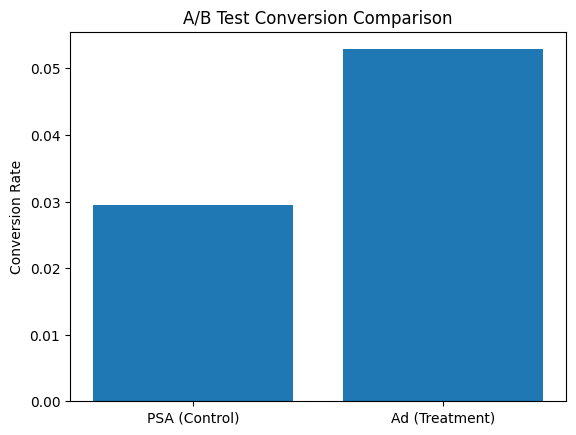

In [51]:
plt.bar(["PSA (Control)", "Ad (Treatment)"],[control_rate, treatment_rate])
plt.ylabel("Conversion Rate")
plt.title("A/B Test Conversion Comparison")
plt.show()

In [52]:
summary = pd.DataFrame({
    "Group": ["Control", "Treatment"],
    "Conversion_Rate": [control_rate, treatment_rate],
})

summary.to_csv("ab_test_summary.csv", index = False)